#### This is Owen Monroe's Jupyter Notebook for IS-567 Text Mining Homework Assignment 4
October 22, 2023

Word Embeddings 1. Create Your Own Word Embeddings

In [57]:
import pandas as pd
import numpy
import gensim
import nltk
import re
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath

In [23]:
# Importing the data 

null_fairytale_df = pd.read_csv('fairy_tale.csv')
null_fairytale_df

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fairy_tale,country,character,gender,count_of_appearance,if_main(>=20),sentences,sentences_list,Unnamed: 8,Unnamed: 9,...,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192
0,cannetella,NaN,wife,female,3,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cannetella,NaN,heir,male,3,0,"the king, who felt himself growing old and fee...","['the king, who felt himself growing old and f...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cannetella,NaN,king,male,21,1,there was once upon a time a king who reigned ...,['there was once upon a time a king who reigne...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cannetella,NaN,man,male,18,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cannetella,NaN,slave,male,1,0,"it is enough that i am once more with you, and...","['it is enough that i am once more with you, a...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,the_golden_blackbird,NaN,master,male,3,0,"?€?good gracious!?€? exclaimed the master, ?€?...","['?€?good gracious!?€? exclaimed the master, ?...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6537,the_golden_blackbird,NaN,father,male,7,0,"my father is old, and if he dies i shall inher...","['my father is old, and if he dies i shall inh...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6538,the_golden_blackbird,NaN,brother,male,10,0,the youth took the same direction as his broth...,['the youth took the same direction as his bro...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6539,the_golden_blackbird,NaN,girl,female,1,0,"the porcelain maiden is a young girl, beautifu...","['the porcelain maiden is a young girl, beauti...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Subsetting the Data

fairytail_df = null_fairytale_df.dropna(subset=['sentences'])

In [25]:
fairytail_df

,fairy_tale,country,character,gender,count_of_appearance,if_main(>=20),sentences,sentences_list,Unnamed: 8,Unnamed: 9,...,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192
0,cannetella,NaN,wife,female,3,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cannetella,NaN,heir,male,3,0,"the king, who felt himself growing old and fee...","['the king, who felt himself growing old and f...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cannetella,NaN,king,male,21,1,there was once upon a time a king who reigned ...,['there was once upon a time a king who reigne...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cannetella,NaN,man,male,18,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cannetella,NaN,slave,male,1,0,"it is enough that i am once more with you, and...","['it is enough that i am once more with you, a...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,the_golden_blackbird,NaN,master,male,3,0,"?€?good gracious!?€? exclaimed the master, ?€?...","['?€?good gracious!?€? exclaimed the master, ?...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6537,the_golden_blackbird,NaN,father,male,7,0,"my father is old, and if he dies i shall inher...","['my father is old, and if he dies i shall inh...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6538,the_golden_blackbird,NaN,brother,male,10,0,the youth took the same direction as his broth...,['the youth took the same direction as his bro...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6539,the_golden_blackbird,NaN,girl,female,1,0,"the porcelain maiden is a young girl, beautifu...","['the porcelain maiden is a young girl, beauti...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Tokenizing the Sentences column to create word embeddings 

sentences_list=[]

for line in fairytail_df['sentences']:
    line = line.lower()  
    words = re.findall(r'\b\w+\b', line)  
    sentences_list.append(words)

In [27]:
# Creating a SKIP GRAM word embedding

model_fairy_skip = Word2Vec(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=1)

In [36]:
# Top 20 most similar words to Man, Woman, King, Queen for SKIP GRAM word embeddings 

sim_skip_man = model_fairy_skip.wv.most_similar('man', topn=20)

sim_skip_woman = model_fairy_skip.wv.most_similar('woman', topn=20)

sim_skip_king = model_fairy_skip.wv.most_similar('king', topn=20)

sim_skip_queen = model_fairy_skip.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_skip_man}')
print()
print(f'Top 20 Similar to Woman: {sim_skip_woman}')
print()
print(f'Top 20 Similar to King: {sim_skip_king}')
print()
print(f'Top 20 Similar to Queen: {sim_skip_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('traveller', 0.5656145811080933), ('rascals', 0.5577424764633179), ('butler', 0.5519123673439026), ('cowherd', 0.5400987863540649), ('traveler', 0.539752185344696), ('buffalo', 0.5379766225814819), ('woodcutter', 0.5373008251190186), ('lassie', 0.5351888537406921), ('driver', 0.5347450375556946), ('genteel', 0.5336529612541199), ('decrepid', 0.5277686715126038), ('cobbler', 0.526962161064148), ('weaver', 0.5224345326423645), ('watanabe', 0.5222503542900085), ('hist', 0.5215283036231995), ('mending', 0.5204935669898987), ('squire', 0.5190044045448303), ('burner', 0.5178512930870056), ('labourer', 0.5159310698509216), ('youngster', 0.5145142078399658)]

Top 20 Similar to Woman: [('old', 0.6124891638755798), ('hag', 0.5595055222511292), ('butler', 0.5593602657318115), ('toad', 0.5302944183349609), ('deceitful', 0.5248093605041504), ('lassie', 0.5134479403495789), ('sorceress', 0.5129913091659546), ('ogress', 0.507

In [37]:
# Creating a CBOW word embedding

model_fairy_cbow = Word2Vec(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=0)

In [38]:
# Top 20 most similar words to Man, Woman, King, Queen for CBOW word embeddings 

sim_cbow_man = model_fairy_cbow.wv.most_similar('man', topn=20)

sim_cbow_woman = model_fairy_cbow.wv.most_similar('woman', topn=20)

sim_cbow_king = model_fairy_cbow.wv.most_similar('king', topn=20)

sim_cbow_queen = model_fairy_cbow.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_cbow_man}')
print()
print(f'Top 20 Similar to Woman: {sim_cbow_woman}')
print()
print(f'Top 20 Similar to King: {sim_cbow_king}')
print()
print(f'Top 20 Similar to Queen: {sim_cbow_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('gentleman', 0.7557704448699951), ('fellow', 0.7401665449142456), ('woman', 0.6572297811508179), ('wolf', 0.6333556175231934), ('magician', 0.6246768236160278), ('farmer', 0.6183725595474243), ('lad', 0.6127009391784668), ('shepherd', 0.6115300059318542), ('dame', 0.6057314276695251), ('beastie', 0.5835900902748108), ('manito', 0.5745090246200562), ('negro', 0.5732341408729553), ('fool', 0.5460941791534424), ('spitfire', 0.5460121631622314), ('butler', 0.544127345085144), ('gallants', 0.5436473488807678), ('housekeeper', 0.5367758870124817), ('hag', 0.5348663926124573), ('fisherman', 0.5333436131477356), ('couple', 0.5325249433517456)]

Top 20 Similar to Woman: [('witch', 0.8140804171562195), ('dame', 0.7392665147781372), ('nurse', 0.7332735657691956), ('hag', 0.6956865191459656), ('beastie', 0.6773059964179993), ('man', 0.6572297215461731), ('butler', 0.6546463966369629), ('lady', 0.648760199546814), ('manuscr

In [40]:
# Creating a FASTTEXT word embedding Model

model_fairy_fast = FastText(
        sentences_list,
        vector_size=300,
        window=5,
        min_count=1,
        sg=1)

In [41]:
# Top 20 most similar words to Man, Woman, King, Queen for FASTTEXT word embeddings 

sim_fast_man = model_fairy_fast.wv.most_similar('man', topn=20)

sim_fast_woman = model_fairy_fast.wv.most_similar('woman', topn=20)

sim_fast_king = model_fairy_fast.wv.most_similar('king', topn=20)

sim_fast_queen = model_fairy_fast.wv.most_similar('queen', topn=20)

print('Top 20 Similar Words for SKIP GRAM Word Embedding')
print()
print(f'Top 20 Similar to Man: {sim_fast_man}')
print()
print(f'Top 20 Similar to Woman: {sim_fast_woman}')
print()
print(f'Top 20 Similar to King: {sim_fast_king}')
print()
print(f'Top 20 Similar to Queen: {sim_fast_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('bergman', 0.7351142764091492), ('lawman', 0.7222367525100708), ('zaman', 0.7171884179115295), ('lyman', 0.7162822484970093), ('marksman', 0.7067833542823792), ('roman', 0.6979021430015564), ('bugleman', 0.6846060156822205), ('dorman', 0.6778278350830078), ('hangman', 0.6759730577468872), ('herdsman', 0.6750156879425049), ('milkman', 0.6725713610649109), ('craftsman', 0.6646818518638611), ('seaman', 0.657578706741333), ('madman', 0.6571933627128601), ('woodman', 0.6484380960464478), ('german', 0.6464890241622925), ('footman', 0.6341878771781921), ('gintleman', 0.6341444849967957), ('kinsman', 0.6334304213523865), ('bellman', 0.623479425907135)]

Top 20 Similar to Woman: [('womanhood', 0.7955939769744873), ('roman', 0.7868207097053528), ('womanish', 0.7823467254638672), ('washerwoman', 0.7591012120246887), ('gentlewoman', 0.7541202902793884), ('lyman', 0.6377798318862915), ('milkman', 0.6365914344787598), ('coun

Word Embeddings 2. Use pretrained word embeddings

In [45]:
new_glove_file="glove.6B.100d.100K.txt"
new_glove_in_w2v_format="glove.6B.100d.100K.w2v.txt"
_ = glove2word2vec(new_glove_file, new_glove_in_w2v_format)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/3682226210.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(new_glove_file, new_glove_in_w2v_format)


In [46]:
new_glove = KeyedVectors.load_word2vec_format('glove.6B.100d.100K.w2v.txt', binary=False)

In [47]:
# Top 20 most similar words to Man, Woman, King, Queen for GLOVE word embeddings 

sim_glove_man = new_glove.most_similar('man', topn=20)

sim_glove_woman = new_glove.most_similar('woman', topn=20)

sim_glove_king = new_glove.most_similar('king', topn=20)

sim_glove_queen = new_glove.most_similar('queen', topn=20)

print('Top 20 Similar Words for GLOVE Word Embeddings')
print()
print(f'Top 20 Similar to Man: {sim_glove_man}')
print()
print(f'Top 20 Similar to Woman: {sim_glove_woman}')
print()
print(f'Top 20 Similar to King: {sim_glove_king}')
print()
print(f'Top 20 Similar to Queen: {sim_glove_queen}')

Top 20 Similar Words for SKIP GRAM Word Embedding

Top 20 Similar to Man: [('woman', 0.832349419593811), ('boy', 0.7914870977401733), ('one', 0.7788748741149902), ('person', 0.7526816725730896), ('another', 0.752223551273346), ('old', 0.7409117221832275), ('life', 0.7371697425842285), ('father', 0.7370322942733765), ('turned', 0.7347694635391235), ('who', 0.734551191329956), ('whose', 0.7326126098632812), ('girl', 0.7291691303253174), ('he', 0.7255576252937317), ('him', 0.7238516211509705), ('young', 0.7218635082244873), ('himself', 0.7214202284812927), ('friend', 0.7170529365539551), ('once', 0.7132790684700012), ('being', 0.7123121023178101), ('a', 0.7093364000320435)]

Top 20 Similar to Woman: [('girl', 0.8472671508789062), ('man', 0.8323494791984558), ('mother', 0.827568769454956), ('boy', 0.7720510959625244), ('she', 0.7632068395614624), ('child', 0.7601761817932129), ('wife', 0.7505022287368774), ('her', 0.7445705533027649), ('herself', 0.7426273822784424), ('daughter', 0.7264456

Topic Modeling 1: Data Preprocessing

In [50]:
# Creating one DataFrame for Male Characters and one DataFrame for Female Characters

m_fairytale_df = fairytail_df[fairytail_df['gender'] == 'male']

f_fairytale_df = fairytail_df[fairytail_df['gender'] == 'female']

In [54]:
m_char_count = m_fairytale_df['character'].count()

f_char_count = f_fairytale_df['character'].count()

print(f'Male Character Count: {m_char_count}')
print(f'Female Character Count {f_char_count}')

Male Character Count: 4403
Female Character Count 2125


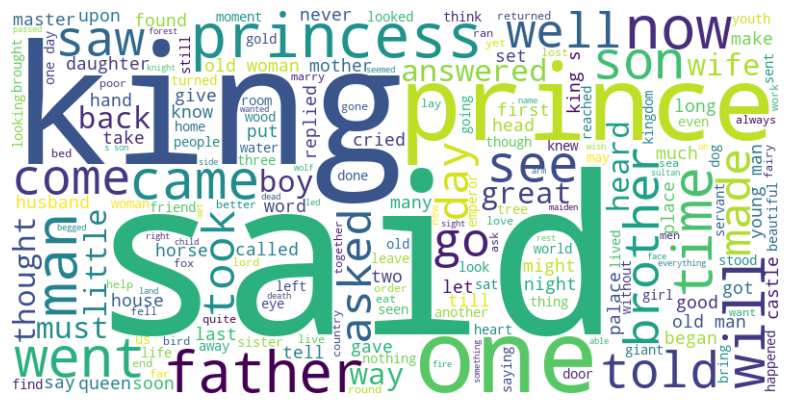

In [56]:
# Creating a Word Cloud for Sentences for Male Characters

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(m_fairytale_df['sentences']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [76]:
# Preparing Male Character DataFrame for LDA Analysis 

#Cleaning Text to just words


m_fairytale_df['Cleaned Sentences'] = m_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/3512405701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['Cleaned Sentences'] = m_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)


In [82]:

# Tokenizing with NLTK
from nltk.tokenize import word_tokenize  

m_fairytale_df['NLTK Tokenized Sentences'] = m_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)


/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/2756266493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['NLTK Tokenized Sentences'] = m_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)


In [84]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(word_list):
    return [word for word in word_list if word not in stop_words]

In [85]:

m_fairytale_df['StopwordRemoved Sentences'] = m_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)



/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/3389979546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fairytale_df['StopwordRemoved Sentences'] = m_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)


In [87]:
m_fairytale_df

,fairy_tale,country,character,gender,count_of_appearance,if_main(>=20),sentences,sentences_list,NLTK Tokenized Sentences,StopwordRemoved Sentences,Cleaned Sentences
1,cannetella,NaN,heir,male,3,0,"the king, who felt himself growing old and fee...","['the king, who felt himself growing old and f...","[the, king, who, felt, himself, growing, old, ...","[king, felt, growing, old, feeble, longed, see...",the king who felt himself growing old and feeb...
2,cannetella,NaN,king,male,21,1,there was once upon a time a king who reigned ...,['there was once upon a time a king who reigne...,"[there, was, once, upon, a, time, a, king, who...","[upon, time, king, reigned, country, called, b...",there was once upon a time a king who reigned ...
3,cannetella,NaN,man,male,18,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...","[but, at, last, after, he, had, been, married,...","[last, married, many, years, quite, old, man, ...",but at last after he had been married for many...
4,cannetella,NaN,slave,male,1,0,"it is enough that i am once more with you, and...","['it is enough that i am once more with you, a...","[it, is, enough, that, i, am, once, more, with...","[enough, shall, never, leave, would, rather, s...",it is enough that i am once more with you and ...
5,cannetella,NaN,husband,male,9,0,when she was eighteen years old her father cal...,['when she was eighteen years old her father c...,"[when, she, was, eighteen, years, old, her, fa...","[eighteen, years, old, father, called, said, a...",when she was eighteen years old her father cal...
...,...,...,...,...,...,...,...,...,...,...,...
6535,the_golden_blackbird,NaN,lord,male,4,0,once upon a time there was a great lord who ha...,['once upon a time there was a great lord who ...,"[once, upon, a, time, there, was, a, great, lo...","[upon, time, great, lord, three, sonsso, old, ...",once upon a time there was a great lord who ha...
6536,the_golden_blackbird,NaN,master,male,3,0,"?€?good gracious!?€? exclaimed the master, ?€?...","['?€?good gracious!?€? exclaimed the master, ?...","[good, gracious, exclaimed, the, master, how, ...","[good, gracious, exclaimed, master, lets, touc...",good gracious exclaimed the master how is it t...
6537,the_golden_blackbird,NaN,father,male,7,0,"my father is old, and if he dies i shall inher...","['my father is old, and if he dies i shall inh...","[my, father, is, old, and, if, he, dies, i, sh...","[father, old, dies, shall, inherit, goods, old...",my father is old and if he dies i shall inheri...
6538,the_golden_blackbird,NaN,brother,male,10,0,the youth took the same direction as his broth...,['the youth took the same direction as his bro...,"[the, youth, took, the, same, direction, as, h...","[youth, took, direction, brother, came, cross,...",the youth took the same direction as his broth...


In [89]:
# Preparing Female Character DataFrame for LDA Analysis 

#Cleaning Text to just words and spaces

f_fairytale_df['Cleaned Sentences'] = f_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)

# Tokenizing with NLTK

from nltk.tokenize import word_tokenize  
f_fairytale_df['NLTK Tokenized Sentences'] = f_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)

f_fairytale_df['StopwordRemoved Sentences'] = f_fairytale_df['NLTK Tokenized Sentences'].apply(remove_stopwords)

/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/73522571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_fairytale_df['Cleaned Sentences'] = f_fairytale_df['sentences'].str.replace(r'[^A-Za-z0-9_ ]+', '', regex=True)
/var/folders/8c/38d5fhqx2_jf385d_b3cq3j00000gn/T/ipykernel_33112/73522571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_fairytale_df['NLTK Tokenized Sentences'] = f_fairytale_df['Cleaned Sentences'].apply(nltk.word_tokenize)
/var/folders/8c/38d5fhqx2_jf385d_b3cq3

In [91]:
f_fairytale_df.dropna(how='all', axis=1, inplace=True) 

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [92]:
f_fairytale_df

,fairy_tale,country,character,gender,count_of_appearance,if_main(>=20),sentences,sentences_list,Cleaned Sentences,NLTK Tokenized Sentences,StopwordRemoved Sentences
0,cannetella,NaN,wife,female,3,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",but at last after he had been married for many...,"[but, at, last, after, he, had, been, married,...","[last, married, many, years, quite, old, man, ..."
6,cannetella,NaN,princess,female,10,0,you are determined not to have a husband at al...,['you are determined not to have a husband at ...,you are determined not to have a husband at al...,"[you, are, determined, not, to, have, a, husba...","[determined, husband, marry, someone, shall, m..."
9,cannetella,NaN,daughter,female,13,0,"but at last, after he had been married for man...","['but at last, after he had been married for m...",but at last after he had been married for many...,"[but, at, last, after, he, had, been, married,...","[last, married, many, years, quite, old, man, ..."
10,cannetella,NaN,girl,female,4,0,"she grew up into a beautiful girl, and was as ...","['she grew up into a beautiful girl, and was a...",she grew up into a beautiful girl and was as t...,"[she, grew, up, into, a, beautiful, girl, and,...","[grew, beautiful, girl, tall, straight, young,..."
13,cannetella,NaN,woman,female,4,0,when the wicked magician heard this he was bes...,['when the wicked magician heard this he was b...,when the wicked magician heard this he was bes...,"[when, the, wicked, magician, heard, this, he,...","[wicked, magician, heard, beside, rage, hasten..."
...,...,...,...,...,...,...,...,...,...,...,...
6521,sylvain_and_jocosa,NaN,fairy,female,11,0,it happened one day that the fairy of the mead...,['it happened one day that the fairy of the me...,it happened one day that the fairy of the mead...,"[it, happened, one, day, that, the, fairy, of,...","[happened, one, day, fairy, meadows, passed, s..."
6522,sylvain_and_jocosa,NaN,wife,female,5,0,at last he asked the fowler if he were married...,['at last he asked the fowler if he were marri...,at last he asked the fowler if he were married...,"[at, last, he, asked, the, fowler, if, he, wer...","[last, asked, fowler, married, hearing, bade, ..."
6523,sylvain_and_jocosa,NaN,lady,female,1,0,they were startled at first by the sudden appa...,['they were startled at first by the sudden ap...,they were startled at first by the sudden appa...,"[they, were, startled, at, first, by, the, sud...","[startled, first, sudden, apparition, tall, sl..."
6528,sylvain_and_jocosa,NaN,themselves,female,7,0,but what was their horror to see its usually t...,['but what was their horror to see its usually...,but what was their horror to see its usually t...,"[but, what, was, their, horror, to, see, its, ...","[horror, see, usually, tranquil, waters, seeth..."


In [104]:
# Printing Transformations 

m_fairytale_df.loc[m_fairytale_df['fairy_tale'] == 'the_grateful_prince']

,fairy_tale,country,character,gender,count_of_appearance,if_main(>=20),sentences,sentences_list,NLTK Tokenized Sentences,StopwordRemoved Sentences,Cleaned Sentences
985,the_grateful_prince,NaN,friend,male,4,0,"?€?what are you doing here, friend??€? asked t...","['?€?what are you doing here, friend??€? asked...","[what, are, you, doing, here, friend, asked, t...","[friend, asked, stranger, darkness, falling, f...",what are you doing here friend asked the stran...
986,the_grateful_prince,NaN,wizard,male,2,0,?€?here the old wizard has no more power over ...,['?€?here the old wizard has no more power ove...,"[here, the, old, wizard, has, no, more, power,...","[old, wizard, power, us, guard, spellsbut, fat...",here the old wizard has no more power over us ...
987,the_grateful_prince,NaN,idiot,male,3,0,"?€?to morrow i have got an idiot?€?s work,?€? ...","['?€?to morrow i have got an idiot?€?s work,?€...","[to, morrow, i, have, got, an, idiots, work, s...","[morrow, got, idiots, work, said, nothing, tak...",to morrow i have got an idiots work said he no...
988,the_grateful_prince,NaN,wolf,male,1,0,"first he chose some stout ropes, and then he l...","['first he chose some stout ropes, and then he...","[first, he, chose, some, stout, ropes, and, th...","[first, chose, stout, ropes, led, horse, stabl...",first he chose some stout ropes and then he le...
989,the_grateful_prince,NaN,son,male,9,0,"when the king?€?s anger was spent, and he was ...","['when the king?€?s anger was spent, and he wa...","[when, the, kings, anger, was, spent, and, he,...","[kings, anger, spent, able, think, best, done,...",when the kings anger was spent and he was able...
991,the_grateful_prince,NaN,master,male,20,1,"?€?i have nothing to give you save my life, ev...","['?€?i have nothing to give you save my life, ...","[i, have, nothing, to, give, you, save, my, li...","[nothing, give, save, life, even, coat, back, ...",i have nothing to give you save my life even t...
992,the_grateful_prince,NaN,servant,male,7,0,so one day he put on the dress of a farm serva...,['so one day he put on the dress of a farm ser...,"[so, one, day, he, put, on, the, dress, of, a,...","[one, day, put, dress, farm, servant, threw, s...",so one day he put on the dress of a farm serva...
993,the_grateful_prince,NaN,fellow,male,7,0,"i want a sharp fellow in the house, and you pl...","['i want a sharp fellow in the house, and you ...","[i, want, a, sharp, fellow, in, the, house, an...","[want, sharp, fellow, house, please, indeed, s...",i want a sharp fellow in the house and you ple...
994,the_grateful_prince,NaN,father,male,7,0,"he made all the haste he could, and just as he...","['he made all the haste he could, and just as ...","[he, made, all, the, haste, he, could, and, ju...","[made, haste, could, reached, great, gates, ca...",he made all the haste he could and just as he ...
995,the_grateful_prince,NaN,milkman,male,1,0,the black cow watched him with surprise for so...,['the black cow watched him with surprise for ...,"[the, black, cow, watched, him, with, surprise...","[black, cow, watched, surprise, time, said, so...",the black cow watched him with surprise for so...
